<h1>Assignment IV– Individual Take Home Assignment</h1>

<h3>1. ANN regression model</h3>

In [83]:
#import libraries 

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
#Import Variables & standardize
dataset=np.loadtxt("data/school_grades.csv", delimiter=",", skiprows=1)
x=dataset[:,0:4]
y=dataset[:,4]
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [85]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [86]:
#defining a 3 layer deep NN [12,8,1]
model = Sequential()
model.add(Dense(12, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [87]:
#The mean_squared_error (mse) and mean_absolute_error (mae) are our loss functions – i.e. an estimate of how accurate the neural network is in predicting the test data. 
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [88]:
#fitting model
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 236 samples, validate on 60 samples
Epoch 1/150
236/236 [==============================] - 0s 850us/sample - loss: 0.3083 - mse: 0.3083 - mae: 0.5139 - val_loss: 0.3111 - val_mse: 0.3111 - val_mae: 0.5267
Epoch 2/150
236/236 [==============================] - 0s 78us/sample - loss: 0.2760 - mse: 0.2760 - mae: 0.4868 - val_loss: 0.2763 - val_mse: 0.2763 - val_mae: 0.4952
Epoch 3/150
236/236 [==============================] - 0s 55us/sample - loss: 0.2454 - mse: 0.2454 - mae: 0.4593 - val_loss: 0.2444 - val_mse: 0.2444 - val_mae: 0.4644
Epoch 4/150
236/236 [==============================] - 0s 47us/sample - loss: 0.2170 - mse: 0.2170 - mae: 0.4317 - val_loss: 0.2151 - val_mse: 0.2151 - val_mae: 0.4341
Epoch 5/150
236/236 [==============================] - 0s 55us/sample - loss: 0.1909 - mse: 0.1909 - mae: 0.4049 - val_loss: 0.1871 - val_mse: 0.1871 - val_mae: 0.4029
Epoch 6/150
236/236 [==============================] - 0s 59us/sample - loss: 0.1655 - mse: 0.1655 - mae: 0.3764 -

236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0574 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0465
Epoch 98/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0580 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0469
Epoch 99/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0579 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0465
Epoch 100/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0575 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0459
Epoch 101/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0568 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0457
Epoch 102/150
236/236 [==============================] - 0s 42us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0575 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


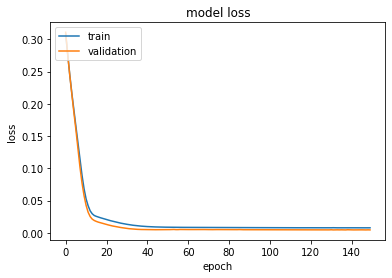

In [89]:
print(history.history.keys())
# plotting loss function with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:
y_pred = model.predict(X_test)

MSE_scaled = mean_squared_error(y_test, y_pred)

MSE = mean_squared_error(y_test, scaler_y.inverse_transform(y_pred))  

print("Scaled MSE:",MSE_scaled)
print("MSE:",MSE)

Scaled MSE: 0.015257056308782718
MSE: 105.89927771966377


<h3>2. Multiple Linear Regression Model</h3>

In [91]:
#import libraries 

%matplotlib inline

from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [92]:
#importing data
df = pd.read_csv('data/school_grades.csv')

#making copy to work with
df_copy = df.copy()

X = df_copy.drop(['G3'], axis=1)
y = df_copy["G3"]

#splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [93]:
# Fit regression model
results = smf.ols('G3 ~ age + absences + G1 + G2', data=pd.concat([X_train,y_train], axis=1)).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     319.9
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          2.57e-101
Time:                        00:00:55   Log-Likelihood:                -570.03
No. Observations:                 276   AIC:                             1150.
Df Residuals:                     271   BIC:                             1168.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1265      1.667      0.676      0.5

In [94]:
y_pred = results.predict(X_test)

MSE = mean_squared_error(y_test, y_pred) 

print("MSE:",MSE)

MSE: 3.5066709721080156
